In [1]:
from scipy.stats import norm, gmean
import numpy as np
import math
from numba import jit, prange
import matplotlib.pyplot as plt

# Структурные продукты с полной защитой капитала

## СП с использованием азиатских опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется рост акции. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1 день. Постройте структурный продукт с полной гарантией возврата инвестированного капитала и азиатского опциона call.

In [5]:
def Geometric_Average_Rate_Call(S, K , T , r , b , sigma):
  sigmaA = sigma/np.sqrt(3)
  bA = (b - sigma**2/6)/2
  d1 = (np.log(S/K)+(bA + sigmaA**2/2)*T)/(sigmaA*np.sqrt(T))
  d2 = d1 - sigmaA * np.sqrt(T)
  return S * np.exp((bA - r)*T) * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

S = 100
K = 100
T = 1
r = 0.07
q = 0.0
sigma = 0.3

print ('Геометрическая среднее. Стоимость азиатского опциона колл =', Geometric_Average_Rate_Call(S , K , T , r , r-q , sigma))
# 7.906075677449117

Геометрическая среднее. Стоимость азиатского опциона колл = 7.906075677449117


## Задача

Задача. В услових примера вычислите коэффициент участия.

Ответ: PR = 85.5%

In [6]:
# Вычисление стоимости азиатского опциона
call_price = Geometric_Average_Rate_Call(S, K, T, r, r - q, sigma)
print('Стоимость азиатского опциона колл:', call_price)

# Сумма для инвестирования
cash = 100000  # 0,1 млн рублей

# Коэффициент участия (PR)
risk_part = cash - cash * np.exp(-r * T)
PR = S * round(risk_part / call_price) / cash
print('Коэффициент участия =', PR * 100, '%')


Стоимость азиатского опциона колл: 7.906075677449117
Коэффициент участия = 85.5 %


## Задача

Задача. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется падение акции. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1 день. Постройте структурный продукт с полной гарантией возврата инвестированного капитала и азиатского опциона put.

Постройте графики выплат для опциона колл и пут. Сделайте выводы.

Стоимость азиатского опциона пут: 4.99 рублей
Стоимость азиатского опциона колл: 8.34 рублей


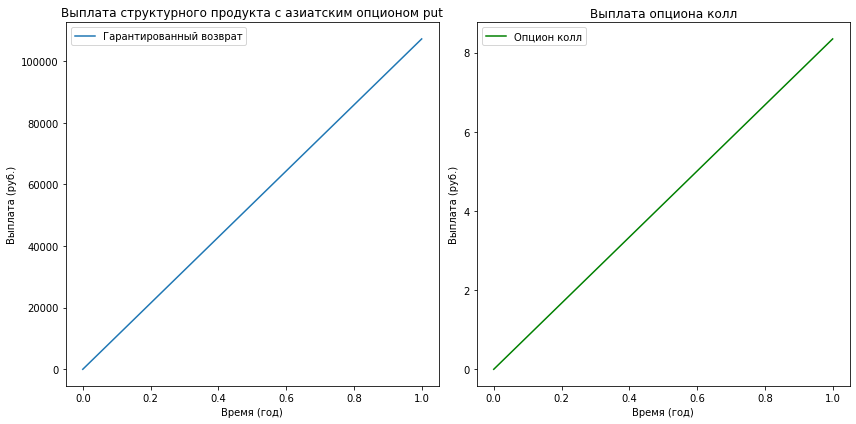

In [42]:
# Параметры задачи
S0 = 100           # начальная цена акции
K = 100            # страйк опциона
T = 1              # срок до погашения (1 год)
sigma = 0.3        # волатильность
r = 0.07           # безрисковая ставка
initial_investment = 100000  # начальная сумма инвестиций (100 тыс. рублей)
n_steps = 365      # количество шагов (1 шаг в день)
n_paths = 10000    # количество симуляций (траекторий)

# 1. Моделирование азиатского опциона пут методом Монте-Карло
def monte_carlo_asian_put(S0, K, T, r, sigma, n_paths, n_steps):
    dt = T / n_steps  # шаг по времени
    payoffs = []

    for _ in range(n_paths):
        S = np.zeros(n_steps)
        S[0] = S0
        for t in range(1, n_steps):
            Z = np.random.normal(0, 1)  # нормальное распределение
            S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

        # Средняя цена
        avg_S = np.mean(S)
        # Вычисляем payoff для опциона put
        payoff = max(K - avg_S, 0)
        payoffs.append(payoff)
    
    # Среднее значение по всем траекториям, дисконтированное на момент времени T
    return np.exp(-r * T) * np.mean(payoffs)

# 2. Моделирование опциона колл методом Монте-Карло
def monte_carlo_asian_call(S0, K, T, r, sigma, n_paths, n_steps):
    dt = T / n_steps  # шаг по времени
    payoffs = []

    for _ in range(n_paths):
        S = np.zeros(n_steps)
        S[0] = S0
        for t in range(1, n_steps):
            Z = np.random.normal(0, 1)  # нормальное распределение
            S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

        # Средняя цена
        avg_S = np.mean(S)
        # Вычисляем payoff для опциона call
        payoff = max(avg_S - K, 0)
        payoffs.append(payoff)
    
    # Среднее значение по всем траекториям, дисконтированное на момент времени T
    return np.exp(-r * T) * np.mean(payoffs)

# 3. Построение графиков выплат
def plot_payoffs():
    # Гарантированный возврат
    guaranteed_return = initial_investment * np.exp(r * T)

    # Стоимость азиатского опциона пут
    asian_put_value = monte_carlo_asian_put(S0, K, T, r, sigma, n_paths, n_steps)
    print(f"Стоимость азиатского опциона пут: {asian_put_value:.2f} рублей")

    # Стоимость азиатского опциона колл
    asian_call_value = monte_carlo_asian_call(S0, K, T, r, sigma, n_paths, n_steps)
    print(f"Стоимость азиатского опциона колл: {asian_call_value:.2f} рублей")

    # График выплат для азиатского опциона пут
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot([0, 1], [0, guaranteed_return], label="Гарантированный возврат")
    plt.title("Выплата структурного продукта с азиатским опционом put")
    plt.xlabel("Время (год)")
    plt.ylabel("Выплата (руб.)")
    plt.legend()

    # График выплат для азиатского опциона колл
    plt.subplot(1, 2, 2)
    plt.plot([0, 1], [0, asian_call_value], label="Опцион колл", color='green')
    plt.title("Выплата опциона колл")
    plt.xlabel("Время (год)")
    plt.ylabel("Выплата (руб.)")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Вывод графиков и расчет стоимости
plot_payoffs()


## Задача

Задача. Проведите исследование и сравните влияние периодичности наблюдения (1 день, 1 неделя, 1 месяц) на
*   стоимость азиатского опциона,
*   волатильность.

Сделайте выводы, подкрепите выводы иллюстративными графиками.

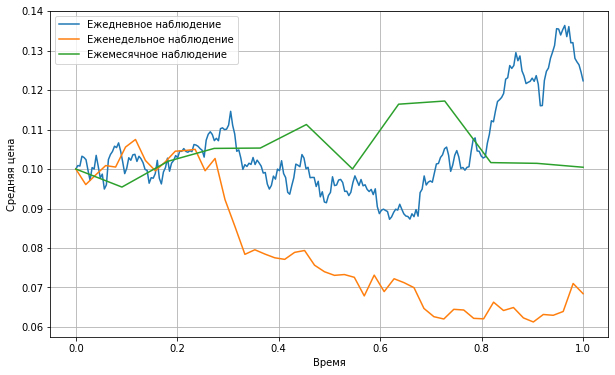

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Моделируем цену с различной периодичностью наблюдения
def simulate_price(S0, mu, sigma, T, n, periods):
    dt = T / n
    S = np.zeros((periods, n))
    S[0] = S0
    for p in range(periods):
        for i in range(1, n):
            S[p][i] = S[p][i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.random.normal(0, np.sqrt(dt)))
    return S

# Параметры
S0 = 100
K = 100
T = 1
r = 0.07
sigma = 0.3
mu = r - (0.5 * sigma ** 2)

# Периоды наблюдения
n_days = 250
n_weeks = 52
n_months = 12

# Симуляции для разных периодов
prices_daily = simulate_price(S0, mu, sigma, T, n_days, 1000)
prices_weekly = simulate_price(S0, mu, sigma, T, n_weeks, 1000)
prices_monthly = simulate_price(S0, mu, sigma, T, n_months, 1000)

# Графики
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0,T,len(prices_daily.mean(axis=0))),prices_daily.mean(axis=0), label="Ежедневное наблюдение")
plt.plot(np.linspace(0,T,len(prices_weekly.mean(axis=0))),prices_weekly.mean(axis=0), label="Еженедельное наблюдение")
plt.plot(np.linspace(0,T,len(prices_monthly.mean(axis=0))),prices_monthly.mean(axis=0), label="Ежемесячное наблюдение")
plt.xlabel("Время")
plt.ylabel("Средняя цена")
plt.legend()
plt.grid(True)
plt.show()

Пример 2. Оцените стоимость азиатского опциона колл с использованием метода Монте-Карло. При условиях цена базового актива и страйк 100, дата экспирации через 1 год, безрисковая ставка 7%, волатильность 30%. Переодичность наблюдений - 1 день, количество траекторий 1000.

In [24]:
# Box-Muller transform to generate normal deviates
def getGaussian(mu, sigma, n):

	# Generate a pair of uniform random variables U,V
  U = np.random.uniform(0, 1, n)
  V = np.random.uniform(0, 1, n)

  # Get R~Exponential(1) and Theta~Uniform(0, 2pi) random variables
  R     = -np.log(U)
  Theta = 2*np.pi*V

	# Transform to X and Y
  X = np.multiply(np.sqrt(2*R), np.cos(Theta))
  Y = np.multiply(np.sqrt(2*R), np.sin(Theta))

  # Perform location-scale transform
  X = mu + sigma*X
  Y = mu + sigma*Y
  return X, Y

In [25]:
def gbm_mcs(mu, sigma, S0, T, n, noOfPaths):
  S = []
  delta_t = T/n
  # Mean and variance of a lognormal random walk
  mean = S0 * np.exp((mu+(0.5*sigma**2))*T)
  variance = (S0 ** 2)*np.exp(2*mu*T + 2*(sigma ** 2)*T)*(np.exp(sigma**2)*T-1)
  for i in range(noOfPaths):
    X, Y = getGaussian(0, 1, n)
    dz_t = X
    dW_t = np.sqrt(delta_t) * dz_t
    dX_t = mu * delta_t + sigma * dW_t
    X_t = np.cumsum(dX_t)
    S_t = S0 * np.exp(X_t)
    S.append(S_t)
  S = np.array(S)
  return S, mean, variance

In [26]:
S0    = 100

noOfPaths = 1000
T = 1
n = 250

K = 100
r = 0.07

sigma = 0.3
mu = r - (0.5*sigma**2)

In [27]:
# Simulate a lognormal random walk
S, mean, variance = gbm_mcs(mu, sigma, S0, T, n, noOfPaths)
c = 0.0
for i in range(noOfPaths):
  c = c + max(np.mean(S[i]) - K, 0)
disc = np.exp(-r*T)
#c = disc * (c/noOfPaths)
print ('Монте-Карло моделирование. Стоимость азиатского опциона колл =', disc * (c/noOfPaths))
#print(c)

Монте-Карло моделирование. Стоимость азиатского опциона колл = 8.912135133360055


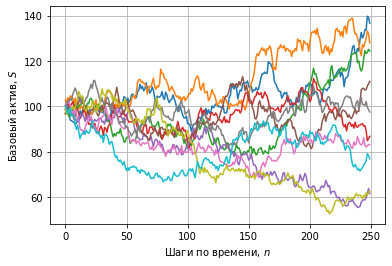

In [28]:
import matplotlib.pyplot as plt

time = list(range(n))
for i in range(10):
  plt.plot(time, S[i])

plt.xlabel('Шаги по времени, $n$')
plt.ylabel('Базовый актив, $S$')
plt.grid(True)
plt.show()

## Задача

Задача. Переписать цикл for и избавиться от использования констант (использовать переменную step).

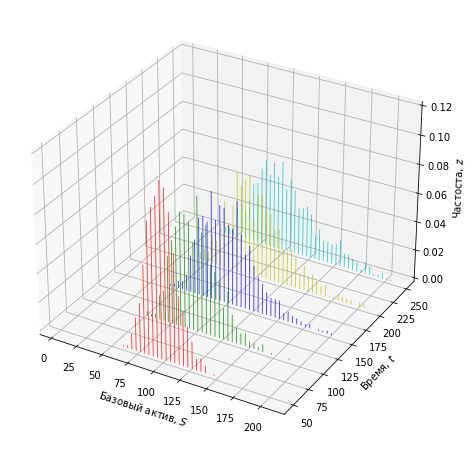

In [29]:
from mpl_toolkits.mplot3d import Axes3D

sd = np.sqrt(variance)
step = 50

# Density plot of the underlying price
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111,projection='3d')
x   = np.linspace(mean-3*sd, mean+3*sd, step+1)

#time = list(range(n))

for i,c in zip([50,100,150,200,250],['r','g','b','y','c']):
  hist, bins = np.histogram(S[:,i-1],bins = x)
  hist = hist/noOfPaths
  cs = [c] * 50
  ax.bar(x[:-1],hist, i, zdir = 'y', color=cs,alpha=0.8)

ax.set_xlabel('Базовый актив, $S$')
ax.set_ylabel('Время, $t$')
ax.set_zlabel('Частоста, $z$')

plt.show()

## Задача

Задача. Проверить гипотезу о том, что на разных временных шагах гистограммы принадлежат одному распределению.

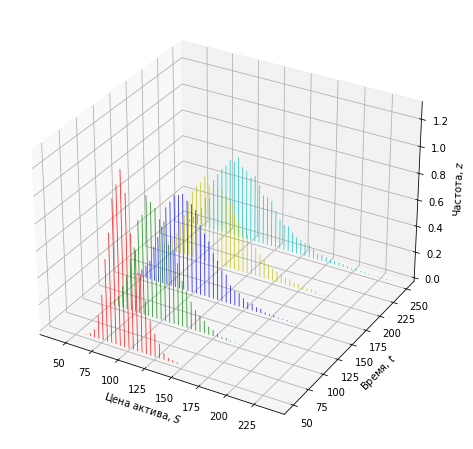

KS test для времени 100: D = 0.0934, p-value = 0.0000
KS test для времени 150: D = 0.1412, p-value = 0.0000
KS test для времени 200: D = 0.1823, p-value = 0.0000
KS test для времени 250: D = 0.2086, p-value = 0.0000


In [31]:
from scipy.stats import kstest

# Параметры
S0 = 100      # Начальная цена актива
K = 100       # Страйк (не используется напрямую в этой задаче)
T = 1         # Срок действия опциона
r = 0.07      # Безрисковая ставка
sigma = 0.3   # Волатильность
mu = r - (0.5 * sigma ** 2)
n_steps = 250 # Количество временных шагов
n_paths = 10000  # Количество траекторий

# Функция для генерации траекторий GBM
def gbm_mcs(mu, sigma, S0, T, n, noOfPaths):
    dt = T / n
    S = np.zeros((noOfPaths, n))
    S[:, 0] = S0
    for i in range(1, n):
        dz = np.random.normal(0, 1, noOfPaths)
        S[:, i] = S[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * dz)
    return S

# Генерация траекторий
S = gbm_mcs(mu, sigma, S0, T, n_steps, n_paths)

# Выбор временных шагов для сравнения гистограмм
time_steps = [50, 100, 150, 200, 250]
colors = ['r', 'g', 'b', 'y', 'c']

# Гистограммы и проверка гипотезы
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Массивы для хранения результатов теста Колмогорова-Смирнова
ks_results = []

# Построение гистограмм для разных временных шагов
x = np.linspace(S0 * np.exp((mu - 0.5 * sigma**2) * T - 3 * sigma * np.sqrt(T)),
                S0 * np.exp((mu - 0.5 * sigma**2) * T + 3 * sigma * np.sqrt(T)), 50)

for i, color in zip(time_steps, colors):
    # Строим гистограмму для S[:, i-1]
    hist, bins = np.histogram(S[:, i-1], bins=x)
    hist = hist / noOfPaths
    ax.bar(x[:-1], hist, i, zdir='y', color=color, alpha=0.8)
    
    # Проверяем гипотезу о том, что распределение на текущем шаге и на первом шаге одинаково
    if i != time_steps[0]:
        # Используем критерий Колмогорова-Смирнова (KS-тест)
        D, p_value = kstest(S[:, i-1], S[:, time_steps[0]-1])
        ks_results.append((i, D, p_value))

ax.set_xlabel('Цена актива, $S$')
ax.set_ylabel('Время, $t$')
ax.set_zlabel('Частота, $z$')

plt.show()

# Вывод результатов KS-теста
for i, D, p_value in ks_results:
    print(f"KS test для времени {i}: D = {D:.4f}, p-value = {p_value:.4f}")


In [ ]:
Так как p-value для какого-то шага меньше 0.05, то гипотеза о схожести распределений отвергается, что может свидетельствовать о том, что распределение изменяется по мере прохождения времени.

Пример.
В условиях примера 1

1. Вычислите  результаты от инвестирования используя
формулу выплаты:
$$
r_{SP} =
\max\left( r_{SP \min}, r_{SP \min} + PR \times \frac{P_{avg} - S}{S}\right),
$$
здесь $\frac{P_{avg} - S}{S}$ -- доходность базового актива относительно среднего значения $P_{avg}$, $S$ -- цена начала участия, или страйк встроенных опционов (в
простейшем случае он равен цене спот базового актива на момент выпуска продукта, т.е. $P_0$).

2. Постройте продукт со встроенным азиатским опционом, оцененным методом Монте-Карло. Для уменьшения разброса в качестве control variate использовать геометрическое усреднение. Вычислите доверительный интервал.

3. Сравните полученные результаты с результатами предыдущих задач и подкрепите выводы иллюстративными графиками.

In [32]:
def bs_call_exact(t, s0, k, r, sigma):
    dp = 1 / ( sigma * math.sqrt( t ) ) * ( math.log( s0 / k ) + ( r + sigma**2 / 2) * ( t ) )
    dm = dp - sigma * math.sqrt( t )
    return s0 * norm.cdf(dp) - k * math.exp( - r * t ) * norm.cdf(dm)

# profit compare with vanilla call
def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

@jit(nopython=True, inline = 'always')
def wiener(t):
    return math.sqrt( t ) * np.random.normal(0, 1)

@jit(nopython=True, inline = 'always')
def st(t, s0, r, sigma):
    return s0 * math.exp( ( r - sigma**2 / 2) * t + sigma * wiener( t ) )

@jit(parallel=True, nopython=False)
def asian_bs_call_mc_geom(n_iters, T, t_steps, S0, K, r, sigma):
    payoff = np.zeros(n_iters)
    avg_S = np.zeros(n_iters)
    m = len(t_steps)
    for i in prange(0, n_iters):
        geom_avg_s = 0
        S0_j = S0
        for j in range(1, m):
            S_j = st( (t_steps[j] - t_steps[j-1] ) * T, S0_j, r, sigma)
            S0_j = S_j
            geom_avg_s += math.log(S_j)
        geom_avg_s = math.exp(geom_avg_s / ( m - 1))
        avg_S[i] = geom_avg_s
        payoff[i] = math.exp(-r * T) * max(geom_avg_s - K , 0)
    return payoff, avg_S

In [33]:
N_MC = int(10**5)
T, S0, K, r, sigma = 1, 100, 100, 0.07, 0.3
m = 1000
t_steps = np.array([i/m for i in range(0, m + 1)])
payoff_data, S_data = asian_bs_call_mc_geom(N_MC, T, t_steps, S0, K, r, sigma)
asian_call = np.mean(payoff_data)
print(f"asian call = {asian_call:.4f} +- {1.96 / math.sqrt(n) * np.std(payoff_data):.4f} with 95% prob")

asian call = 7.8500 +- 1.4294 with 95% prob


In [34]:
N = 100000

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / asian_call
PR_1 = K * Q_1/ N
S_1 = np.sort(S_data)
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_1 - S0) / S0 )

print(f"asian call r_sp_mean = {np.mean(r_sp_1)}, PR = {PR_1}")

asian call r_sp_mean = 0.07250818125421636, PR = 0.8612203192710095


In [35]:
european_call = bs_call_exact(T, S0, K, r, sigma)
Q_2 = (N - da) / european_call
PR_2 = K * Q_2/ N
S_2 = np.sort(np.array([st(T, S0, r, sigma) for i in range(0, N_MC)]))
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_2 - S0) / S0 )

print(f"european call r_sp_mean = {np.mean(r_sp_2)}, PR = {PR_2}")

european call r_sp_mean = 0.07273691548314698, PR = 0.44447044652333806


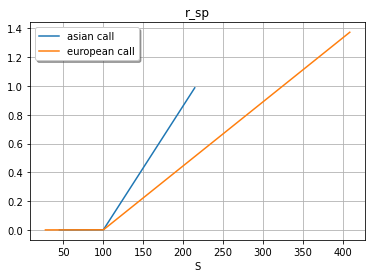

In [36]:
plt.plot(S_1, r_sp_1, label = 'asian call')
plt.plot(S_2, r_sp_2, label = 'european call')

plt.title('r_sp')
plt.xlabel('S')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

In [37]:
S0 = 100
K = 100
T = 1
r = 0.07
q = 0.0
sigma = 0.3
call_price = Geometric_Average_Rate_Call(S0, K , T , r , r-q , sigma)
print ('Geometric average rate call =', call_price)

cash =100_000
risk_part = cash - cash * np.exp(-r * T)
PR = S0 * round(risk_part / call_price) / cash
print('Participation rate = ', PR)

# task calc Rsp
rsp_min = 1 - 1 # full return guarantee (100%) minus 100%
rsp = np.maximum(rsp_min, rsp_min + PR * (S.mean(axis=1).mean() - S0)/S0)
print('Rsp averaged over 1000 samples = {}%'.format(round(rsp*100,2)))

Geometric average rate call = 7.906075677449117
Participation rate =  0.855
Rsp averaged over 1000 samples = 0.87%


In [38]:
# task 2 evaluate asian option price using MC method
import scipy.stats

print('Наблючений:', S.shape)
# geometric averaging
S_means = np.prod(S**(1/S.shape[1]), axis=1)
payoffs = np.exp(-r * T) * np.maximum(S_means - K, 0)
avg_payoff = np.mean(payoffs)
std_error = np.sqrt(np.sum((payoffs - avg_payoff)**2) / (payoffs.shape[0] - 1))
print('Среднее значание функции выплат = ', round(avg_payoff,3))
print('Стандартная ошибка = ', round(std_error, 3))
scaler = scipy.stats.t.ppf((1 + 0.95) / 2., payoffs.shape[0] - 1)
print(f'Доверительный интервал : [{avg_payoff - std_error * scaler:.3f}(0):{avg_payoff + std_error * scaler:.3f}]')

Наблючений: (10000, 250)
Среднее значание функции выплат =  6.596
Стандартная ошибка =  10.549
Доверительный интервал : [-14.083(0):27.274]


In [39]:
# task 3 compare results

print('Analytical Geometric average rate call =', round(call_price, 3))
print('Relative error for MC method = ', round(abs(call_price - avg_payoff) / call_price * 100, 3), '%\n')

# profit compare with vanilla call
def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

call_price = call(S0, K , T , sigma , r, q)
print ('Стоимость опциона колл =', round(call_price, 3))

cash =100_000
risk_part = cash - cash * np.exp(-r * T)
PR = S0 * round(risk_part / call_price) / cash
print('Коэффициент участия = ', PR * 100, '%')

# task calc Rsp
rsp_min = 1 - 1 # full return guarantee (100%) minus 100%
rsp = np.maximum(rsp_min, rsp_min + PR * (S[:, -1].mean() - S0)/S0)
print('Rsp averaged over 1000 samples = {}%'.format(round(rsp*100,2)))

Analytical Geometric average rate call = 7.906
Relative error for MC method =  16.574 %

Стоимость опциона колл = 15.211
Коэффициент участия =  44.4 %
Rsp averaged over 1000 samples = 0.83%


Text(0.5, 0, 'Price S_T')

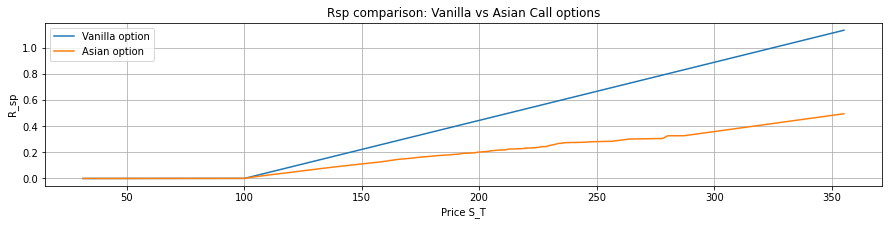

In [40]:
# profit plots
plt.figure(figsize=(15,3))
plt.title('Rsp comparison: Vanilla vs Asian Call options')
rsps = np.maximum(rsp_min, rsp_min + PR * (S[:, -1] - S0)/S0)
plt.plot(sorted(S[:, -1]), sorted(rsps), label='Vanilla option')
rsps2 = np.maximum(rsp_min, rsp_min + PR * payoffs/S0)
plt.plot(sorted(S[:, -1]), sorted(rsps2), label='Asian option')
plt.legend();plt.grid()
plt.ylabel('R_sp')
plt.xlabel('Price S_T')
# according to that payoff for an asian option is dependent on average asset price during the history
# the profit for this product is growth much slower than the one for vanilla option
# but
# it's not necessary has profit starting from price = S0 as below since we plotted only last price
# not average one, so actually it's possible to have positive pnl starting from price much lower

# Задача

Сравните различные методы оценивания (арифметический и Монте-Карло) азиатского опциона для бездивидентных акций:
$S_0= 116,79$, $К= 117$, срок погашения составляет 3 месяца. Волатильность акций составляет 0,02803, а безрисковый процент составляет 0,624% с непрерывным начислением процентов.


https://github.com/olof98johansson/FinancialOptionsModelling

https://webthesis.biblio.polito.it/20278/1/tesi.pdf

In [41]:
# Параметры задачи
S0 = 116.79  # начальная цена акции
K = 117       # страйк
T = 0.25      # срок погашения (3 месяца)
sigma = 0.02803  # волатильность
r = 0.00624   # безрисковая ставка

# 1. Арифметический метод (геометрическое среднее для азиатского опциона)
def asian_call_arithmetic(S0, K, T, r, sigma):
    # Вычисляем геометрическое среднее
    mu = r - 0.5 * sigma**2
    part_1 = S0 * np.exp(mu * T)
    part_2 = (1 + ((r - 0.5 * sigma**2) / sigma**2) * (1 - np.exp(-sigma**2 * T)))
    return np.exp(-r * T) * (part_1 * part_2)

# 2. Метод Монте-Карло
def monte_carlo_asian_call(S0, K, T, r, sigma, n_paths=10000, n_steps=252):
    dt = T / n_steps
    payoffs = []
    
    for _ in range(n_paths):
        # Генерация траектории
        S = np.zeros(n_steps)
        S[0] = S0
        for t in range(1, n_steps):
            Z = np.random.normal(0, 1)  # нормальное распределение
            S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
        
        # Вычисляем среднюю цену
        avg_S = np.mean(S)
        payoff = np.maximum(avg_S - K, 0)  # стоимость опциона (payoff)
        payoffs.append(payoff)
    
    # Среднее значение по всем траекториям, дисконтированное на текущий момент времени
    return np.exp(-r * T) * np.mean(payoffs)

# Оценка через арифметический метод
call_arithmetic = asian_call_arithmetic(S0, K, T, r, sigma)
print(f"Стоимость азиатского опциона (арифметический метод): {call_arithmetic:.4f}")

# Оценка через метод Монте-Карло
call_monte_carlo = monte_carlo_asian_call(S0, K, T, r, sigma, n_paths=10000, n_steps=252)
print(f"Стоимость азиатского опциона (Метод Монте-Карло): {call_monte_carlo:.4f}")

# Оценка с помощью аналитической формулы Блэка-Шоулза для европейского опциона (для сравнения)
def black_scholes_call(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Аналитическое решение для европейского опциона (для сравнения)
call_bs = black_scholes_call(S0, K, T, r, sigma)
print(f"Стоимость европейского опциона (Блэк-Шоулз): {call_bs:.4f}")


Стоимость азиатского опциона (арифметический метод): 116.9492
Стоимость азиатского опциона (Метод Монте-Карло): 0.3259
Стоимость европейского опциона (Блэк-Шоулз): 0.6393


# Структурные продукты без гарантии возврата капитала

## Задача.

Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Ожидается рост цен на акции «A».  Клиент готов нести 30\% потери в случае падении цены акции <<А>> (меньше чем при прямой покупке акции) в обмен на увеличение коэффициента участия. Текущая цена акции 100 руб.

Входные параметры продукта:
*   базовый актив -- акции,
*   срок -- $T = 1$ год,
*   цена начала участия -- $P_0 = 100$рублей,
*   барьерная цена (тип барьера) -- «включаемый» (knock-in) и «выключаемый» (knock-out),
*   условия наблюдения с целью определения пробития барьера -- частота
наблюдений, длина периода наблюдений, расположение периода наблюдений
в случае, если оно частичное – в начале, середине, конце срока продукта;
*   сценарий поведения базового актива -- рост.

Выходной параметр продукта:
*   коэффициент участия.


Проведите расчеты и вычислите коэффициент участия.

In [13]:
def knock_in_option(S0, K, T, r, sigma, barrier, n_steps, n_paths):
    dt = T / n_steps
    payoff = []
    
    for _ in range(n_paths):
        S = S0
        knocked_in = False
        for i in range(n_steps):
            S *= np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.normal(0, 1))
            if S > barrier:  # проверка барьера
                knocked_in = True
        if knocked_in:
            payoff.append(max(S - K, 0))
        else:
            payoff.append(0)
    
    return np.mean(payoff) * np.exp(-r * T)

# Пример данных
S0 = 100
K = 100
T = 1
r = 0.07
sigma = 0.3
barrier = 110
n_steps = 250
n_paths = 10000

knock_in_price = knock_in_option(S0, K, T, r, sigma, barrier, n_steps, n_paths)
print(f"Стоимость knock-in опциона: {knock_in_price:.4f}")


Стоимость knock-in опциона: 15.3791
